In [1]:
pip install tabulate

  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


y = -7.6855+3.2341x
   x      y    predicted_value    residual
----  -----  -----------------  ----------
6.94   0               14.7592    -14.7592
5.23   6.13             9.2288     -3.0988
5.21  11.29             9.1642      2.1258
7.1   14.35            15.2766     -0.9266
8.16  12.03            18.7048     -6.6748
5.5   22.72            10.102      12.618
9.19  20.11            22.0359     -1.9259
9.05  26.16            21.5831      4.5769
9.36  30.65            22.5857      8.0643
r^2 = 32.0%
se = 8.6707


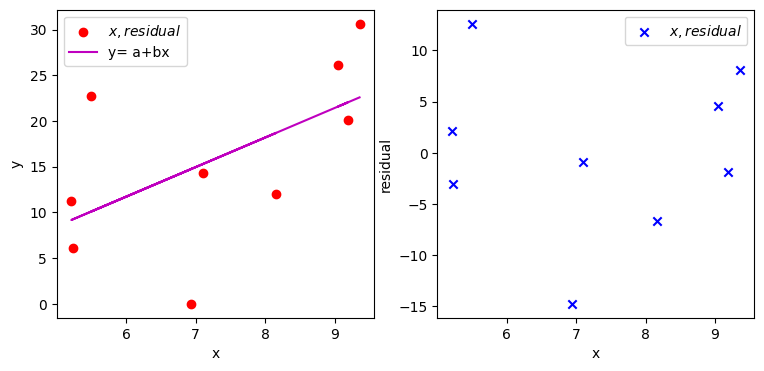

In [2]:
from db import data3
from num import Num
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
x = [i[0] for i in data3]
y = [i[1] for i in data3]
n = len(data3)
num = Num()
a,b,fit = num.least_square_line(x,y)
#print least-square line
print(f'{fit}')
y_hat = [round((a+(b*i)),4) for i in x]

#residual
residual = [round((y[i]-y_hat[i]),4) for i in range(n)]

#SSresid sum((y-y_hat)^2)
SSResid = sum([(y[i] - y_hat[i])**2 for i in range(n)])

#SSTo sum((y-y_mean)^2)
y_mean = num.mean(y)
SSTo = sum([(y[i] - y_mean)**2 for i in range(n)])

#calculate r^2
r_square = round((1-(SSResid/SSTo))*100,2)

#calculate standard deviation about the least-square line, Se
se = round((SSResid/(n-2))**0.5,4)

#combine dataset form all fields
data = list(zip(x,y,y_hat,residual))

#create datatable and print
data_table = tabulate(data,headers = ["x","y","predicted_value","residual"])
print(data_table)

#print value of r^2 and se
print(f'r^2 = {r_square}%')
print(f'se = {se}')
plt.figure(figsize=(9,4))
ax1 = plt.subplot(1,2,1)
ax1.scatter(x,y,c = 'r', marker='o', alpha = 1, label = r'$x,residual$')
ax1.plot(x,a + (b*np.array(x)), '-m', label='y= a+bx')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2 = plt.subplot(1,2,2)
ax2.scatter(x,residual,c = 'b', marker = 'x', alpha =1,label = r'$x,residual$')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('residual')
plt.show()

